# The Developed and Under Developed Districts in Tamil Nadu

**This Project Focuses on finding Similarity between diffrent Districts in Tamil Nadu**

Project Consists Of three Phases
1. Data Extraction
2. Data Pre-processing
3. Exploratory Data Analysis
4. Clustering
5. similarities
6. Dis-similarities

This project focuses on finding under-developed areas/district in TamilNadu. So that anyone want to start a startup business can expand in that region.
It also helps to find similarities and dis-similarities between diffrent districts.

## 1. Data Extraction

In [1]:
import pandas as pd
import numpy as np
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

import requests
import json
from pandas.io.json import json_normalize

In [22]:
url="https://en.wikipedia.org/wiki/List_of_districts_of_Tamil_Nadu"

contents=pd.read_html(url)

In [23]:
columns=["No","District","Code","Capital","Date_Of_Formation","Split_From","Area","Population","Population_Density","Taluks","Map"]

df=contents[1]
df.columns=columns
df.head()

,No,District,Code,Capital,Date_Of_Formation,Split_From,Area,Population,Population_Density,Taluks,Map
0,1.0,Ariyalur,AR,Ariyalur,23 November 2007,Perambalur,1949.31,754894,390,Andimadam Ariyalur Udayarpalayam Sendurai,NaN
1,2.0,Chengalpattu,CGL,Chengalpattu,29 November 2019,Kanchipuram,2944.96,2556244,868,Chengalpattu Cheyyur Madurantakam Pallavaram T...,NaN
2,3.0,Chennai,CH,Chennai,1 November 1956,One of the original 13 districts (under former...,426,4646732,26076,Alandur Ambattur Aminjikarai Ayanavaram Egmore...,NaN
3,4.0,Coimbatore,CO,Coimbatore,1 November 1956,One of the original 13 districts,"4,723[36]",3458045,732,Anaimalai Annur Coimbatore-North Coimbatore-So...,NaN
4,5.0,Cuddalore,CU,Cuddalore,30 September 1993,South Arcot District,3678,2605914,709,Bhuvanagiri Chidambaram Cuddalore Kattumannark...,NaN


## 2. Data Pre-Processing

In [24]:
df.drop(columns=["No","Capital","Map"],inplace=True)
df.Taluks=[i.split(" ") for i in df.Taluks] 
df.Area=df.Area.astype(str)
Area=df.Area.str.split("[",1).str[0].str.strip()
Area=Area.str.replace(",","").str.strip()
df.Area=Area
df.Area=df.Area.astype(float)

In [25]:
df.dtypes

District               object
Code                   object
Date_Of_Formation      object
Split_From             object
Area                  float64
Population              int64
Population_Density      int64
Taluks                 object
dtype: object

In [26]:
df.head()

,District,Code,Date_Of_Formation,Split_From,Area,Population,Population_Density,Taluks
0,Ariyalur,AR,23 November 2007,Perambalur,1949.31,754894,390,"[Andimadam, Ariyalur, Udayarpalayam, Sendurai]"
1,Chengalpattu,CGL,29 November 2019,Kanchipuram,2944.96,2556244,868,"[Chengalpattu, Cheyyur, Madurantakam, Pallavar..."
2,Chennai,CH,1 November 1956,One of the original 13 districts (under former...,426.00,4646732,26076,"[Alandur, Ambattur, Aminjikarai, Ayanavaram, E..."
3,Coimbatore,CO,1 November 1956,One of the original 13 districts,4723.00,3458045,732,"[Anaimalai, Annur, Coimbatore-North, Coimbator..."
4,Cuddalore,CU,30 September 1993,South Arcot District,3678.00,2605914,709,"[Bhuvanagiri, Chidambaram, Cuddalore, Kattuman..."


### Adding Latitude and Longitude

In [27]:
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim

In [28]:
longitude = [] 
latitude = [] 
   
# function to find the coordinate 
# of a given city  
def findGeocode(city): 
       
    # try and catch is used to overcome 
    # the exception thrown by geolocator 
    # using geocodertimedout   
    try: 
        geolocator = Nominatim(user_agent="Data-Analysis") 
          
        return geolocator.geocode(city) 
      
    except GeocoderTimedOut: 
          
        return findGeocode(city)     

for i in (df["District"] +" , Tamil Nadu"): 
      
    if findGeocode(i) != None: 
           
        loc = findGeocode(i)
        latitude.append(loc.latitude) 
        longitude.append(loc.longitude) 
        
    else: 
        latitude.append(np.nan) 
        longitude.append(np.nan) 

In [29]:
df['Latitude']=latitude
df['Longitude']=longitude

In [30]:
df.head()

,District,Code,Date_Of_Formation,Split_From,Area,Population,Population_Density,Taluks,Latitude,Longitude
0,Ariyalur,AR,23 November 2007,Perambalur,1949.31,754894,390,"[Andimadam, Ariyalur, Udayarpalayam, Sendurai]",11.076036,79.117455
1,Chengalpattu,CGL,29 November 2019,Kanchipuram,2944.96,2556244,868,"[Chengalpattu, Cheyyur, Madurantakam, Pallavar...",12.684089,79.983637
2,Chennai,CH,1 November 1956,One of the original 13 districts (under former...,426.00,4646732,26076,"[Alandur, Ambattur, Aminjikarai, Ayanavaram, E...",13.083694,80.270186
3,Coimbatore,CO,1 November 1956,One of the original 13 districts,4723.00,3458045,732,"[Anaimalai, Annur, Coimbatore-North, Coimbator...",11.001812,76.962842
4,Cuddalore,CU,30 September 1993,South Arcot District,3678.00,2605914,709,"[Bhuvanagiri, Chidambaram, Cuddalore, Kattuman...",11.756433,79.763464


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   District            38 non-null     object 
 1   Code                38 non-null     object 
 2   Date_Of_Formation   38 non-null     object 
 3   Split_From          38 non-null     object 
 4   Area                38 non-null     float64
 5   Population          38 non-null     int64  
 6   Population_Density  38 non-null     int64  
 7   Taluks              38 non-null     object 
 8   Latitude            38 non-null     float64
 9   Longitude           38 non-null     float64
dtypes: float64(3), int64(2), object(5)
memory usage: 3.1+ KB


### Exporting as CSV file

In [32]:
df.to_csv("Tamilnadu.csv")

**Latitude and Longitude of Tamil Nadu , India**

Find The latitude and longitude of TamilNadu so that it can be used to view the map of TamilNadu with the help of Folium

In [33]:
address = 'Tamil Nadu, India'

geolocator = Nominatim(user_agent="Data Analysis")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Tamil Nadu are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Tamil Nadu are 10.9094334, 78.3665347.


# 3.Exploratory Data Analysis

### 3.1.Relationship between Area and Population

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Area', ylabel='Population'>

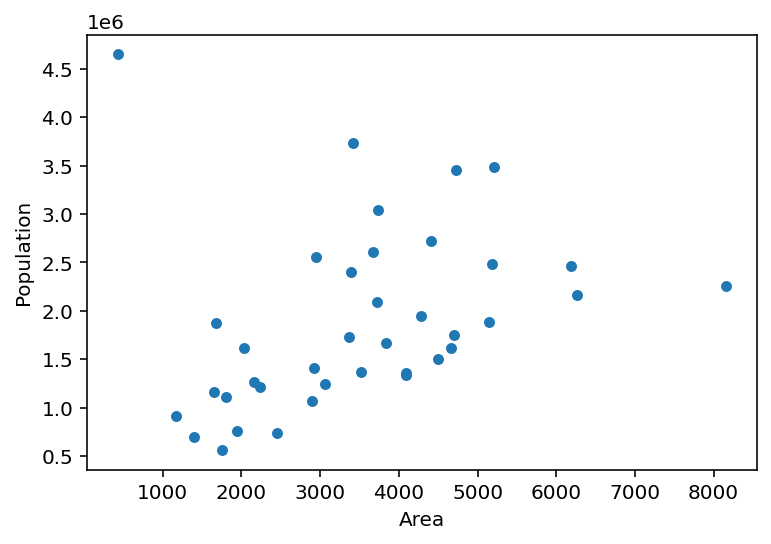

In [48]:
df.plot.scatter("Area","Population")

C:\Users\karthikn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Area', ylabel='Population'>

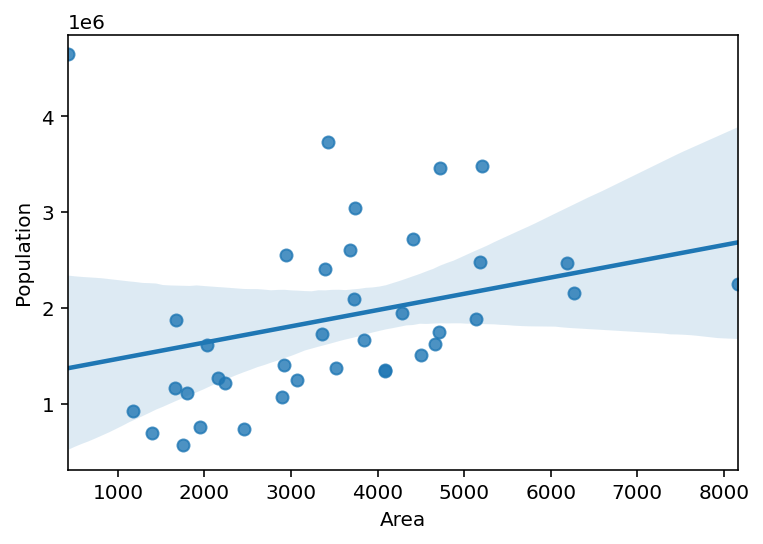

In [50]:
x=df["Area"]
y=df["Population"]
sns.regplot(x,y)

In [101]:
df.corr()

,Area,Population,Population_Density,Latitude,Longitude
Area,1.000000,0.295268,-0.334693,-0.138571,-0.412196
Population,0.295268,1.000000,0.519458,0.222161,0.096738
Population_Density,-0.334693,0.519458,1.000000,0.261485,0.314549
Latitude,-0.138571,0.222161,0.261485,1.000000,0.532381
Longitude,-0.412196,0.096738,0.314549,0.532381,1.000000


### 3.1.Population distribution

<AxesSubplot:>

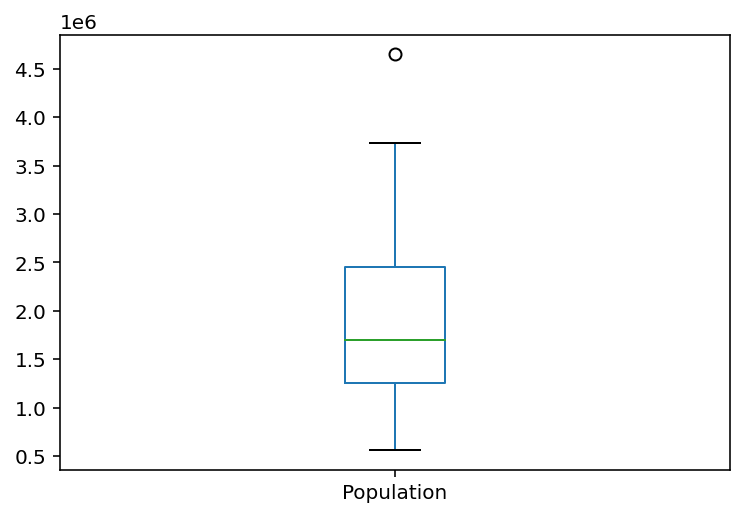

In [47]:
df.Population.plot.box()

<AxesSubplot:xlabel='District'>

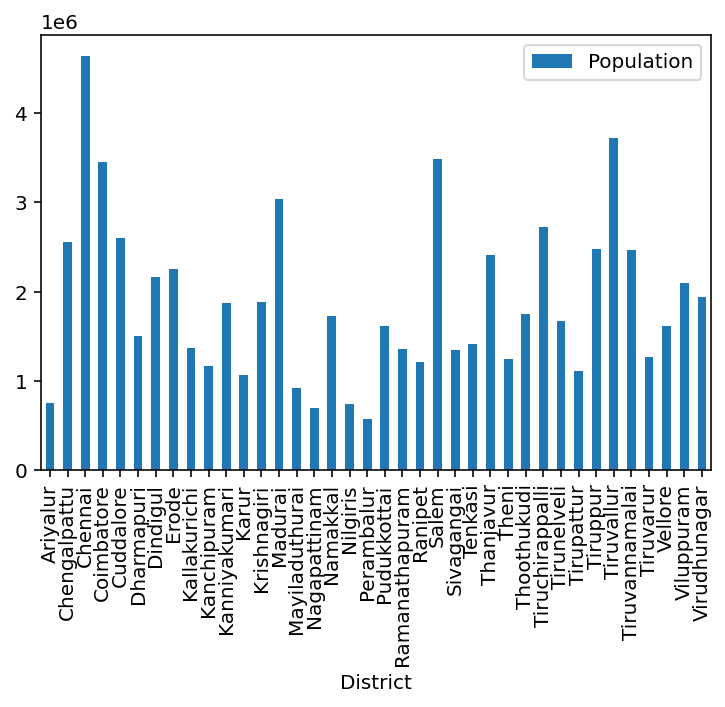

In [45]:
df.plot.bar("District","Population")

**Map Of Tamil Nadu , India**

Map of TamilNadu with different Districts marked at the appropriate Location

In [56]:
map_TamilNadu = folium.Map(location=[latitude, longitude], zoom_start=6.4)

# add markers to map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['District']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=True).add_to(map_TamilNadu)  
    
map_TamilNadu

#### Define Foursquare Credentials and Version

FourSquare uses special type of API which requires FourSquare ID and Password. It shoul be used to get Location information.

In [57]:
CLIENT_ID = '0URO1O34DDEKYCW0LGTEM0FYCND1KJO2EUIFKDRSGDRW3ANX' # your Foursquare ID
CLIENT_SECRET = 'KWQZIUBNSY0M1TUCU3TBYFWDXEEZUVO5WUAKUIMXBGDSQLQP' # your Foursquare Secret
VERSION = '20200605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 0URO1O34DDEKYCW0LGTEM0FYCND1KJO2EUIFKDRSGDRW3ANX
CLIENT_SECRET:KWQZIUBNSY0M1TUCU3TBYFWDXEEZUVO5WUAKUIMXBGDSQLQP


### Explore The Districts of Tamil Nadu

Exploring the Districts of TamilNadu so that we get the location of venues in the particular area. It gives exact location of the venue, it's catagory and name of the venue.

In [58]:
def getNearbyVenues(names, latitudes, longitudes, radius=5000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [59]:
Tamilnadu_venues=getNearbyVenues(df["District"],
                                 df["Latitude"],
                                 df["Longitude"])

Ariyalur
Chengalpattu
Chennai
Coimbatore
Cuddalore
Dharmapuri
Dindigul
Erode
Kallakurichi
Kanchipuram
Kanniyakumari
Karur
Krishnagiri
Madurai
Mayiladuthurai
Nagapattinam
Namakkal
Nilgiris
Perambalur
Pudukkottai
Ramanathapuram
Ranipet
Salem
Sivagangai
Tenkasi
Thanjavur
Theni
Thoothukudi
Tiruchirappalli
Tirunelveli
Tirupattur
Tiruppur
Tiruvallur
Tiruvannamalai
Tiruvarur
Vellore
Viluppuram
Virudhunagar


In [60]:
print(Tamilnadu_venues.shape)
Tamilnadu_venues.head()

(468, 7)


,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Chengalpattu,12.684089,79.983637,SRK,12.698709,79.970428,Movie Theater
1,Chengalpattu,12.684089,79.983637,Changalpettu Bus Stand,12.692468,79.979310,Bus Station
2,Chengalpattu,12.684089,79.983637,Chengalpet To Beach Train,12.693512,79.981451,Light Rail Station
3,Chengalpattu,12.684089,79.983637,Chengalpat Railway Station,12.704485,79.981123,Train Station
4,Chengalpattu,12.684089,79.983637,Kolavai Lake,12.710869,79.980555,Lake


### Grouping All the venues by District

grouping gives the number of venues in the particular district

In [65]:
Tamilnadu_count=Tamilnadu_venues.groupby('District').count()

In [110]:
Tamilnadu_count.head()

,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
District,,,,,,
Chengalpattu,6,6,6,6,6,6
Chennai,94,94,94,94,94,94
Coimbatore,100,100,100,100,100,100
Cuddalore,6,6,6,6,6,6
Dharmapuri,3,3,3,3,3,3


<AxesSubplot:xlabel='District'>

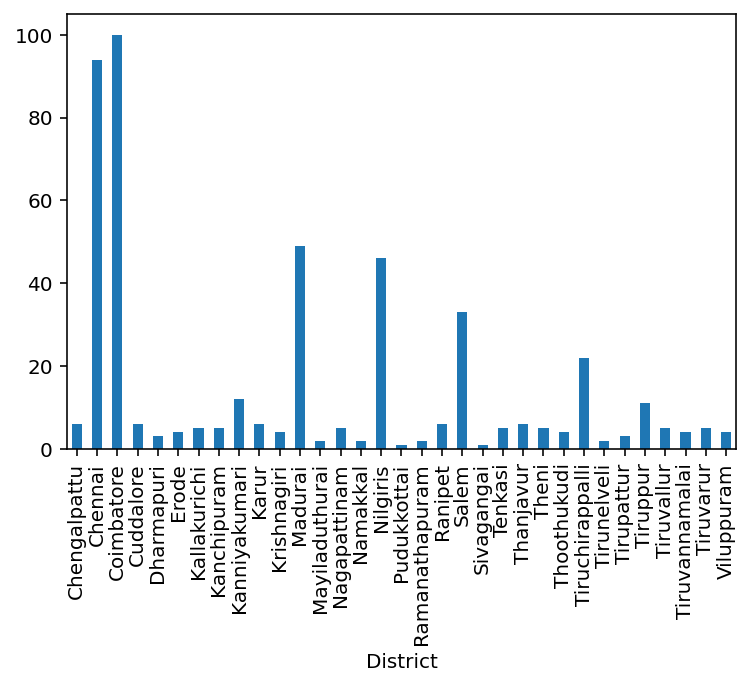

In [69]:
Tamilnadu_count["Venue Category"].plot.bar()

In [83]:
Tamilnadu_count.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, Chengalpattu to Viluppuram
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   District Latitude   33 non-null     int64
 1   District Longitude  33 non-null     int64
 2   Venue               33 non-null     int64
 3   Venue Latitude      33 non-null     int64
 4   Venue Longitude     33 non-null     int64
 5   Venue Category      33 non-null     int64
dtypes: int64(6)
memory usage: 3.1+ KB


In [90]:
x=df[["District","Population"]]
y=Tamilnadu_count
xy_joined=x.join(y,on="District")[["District","Population","Venue Category"]]

In [92]:
xy_joined.head()

,District,Population,Venue Category
0,Ariyalur,754894,NaN
1,Chengalpattu,2556244,6.0
2,Chennai,4646732,94.0
3,Coimbatore,3458045,100.0
4,Cuddalore,2605914,6.0


<AxesSubplot:xlabel='Population', ylabel='Venue Category'>

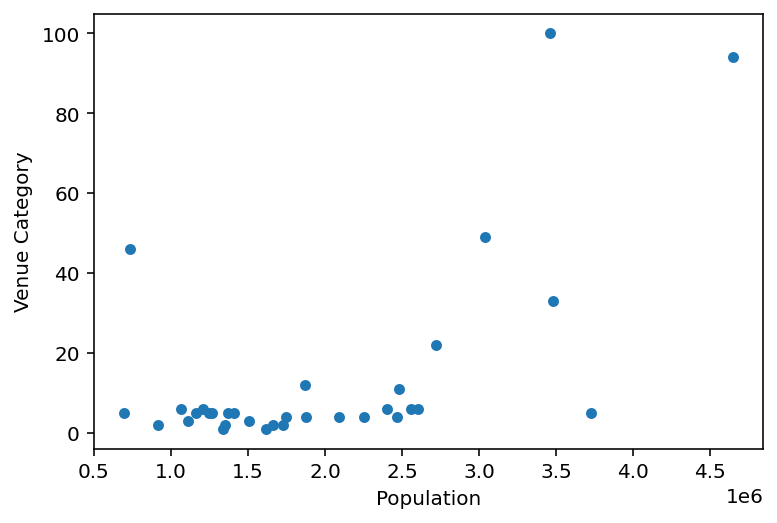

In [93]:
xy_joined.plot.scatter("Population","Venue Category")

### One-Hot Encoding

One-Hot Encoding makes the venues as feature and make them as zero or one based on the existance of the particular venue in that district.

In [120]:
Tamilnadu_onehot = pd.get_dummies(Tamilnadu_venues[['Venue Category']], prefix="", prefix_sep="")

Tamilnadu_onehot['District'] = Tamilnadu_venues['District'] 

fixed_columns = [Tamilnadu_onehot.columns[-1]] + list(Tamilnadu_onehot.columns[:-1])
Tamilnadu_onehot = Tamilnadu_onehot[fixed_columns]


Tamilnadu_onehot.head()

,District,ATM,Accessories Store,African Restaurant,Arcade,Asian Restaurant,BBQ Joint,Bakery,Bank,Bar,...,Tea Room,Theater,Toll Booth,Toll Plaza,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Store,Waterfall,Women's Store
0,Chengalpattu,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Chengalpattu,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Chengalpattu,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Chengalpattu,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Chengalpattu,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Taking mean of the individual venues in the respective District**

In [123]:
Tamilnadu_grouped = Tamilnadu_onehot.groupby('District').mean().reset_index()
Tamilnadu_grouped.head()

,District,ATM,Accessories Store,African Restaurant,Arcade,Asian Restaurant,BBQ Joint,Bakery,Bank,Bar,...,Tea Room,Theater,Toll Booth,Toll Plaza,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Store,Waterfall,Women's Store
0,Chengalpattu,0.0,0.00,0.000000,0.0,0.00,0.00,0.00,0.000000,0.000000,...,0.0,0.000000,0.166667,0.0,0.0,0.166667,0.000000,0.000000,0.0,0.00
1,Chennai,0.0,0.00,0.010638,0.0,0.00,0.00,0.00,0.000000,0.021277,...,0.0,0.010638,0.000000,0.0,0.0,0.021277,0.031915,0.010638,0.0,0.00
2,Coimbatore,0.0,0.02,0.000000,0.0,0.05,0.01,0.01,0.000000,0.010000,...,0.0,0.000000,0.000000,0.0,0.0,0.010000,0.040000,0.000000,0.0,0.01
3,Cuddalore,0.0,0.00,0.000000,0.0,0.00,0.00,0.00,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.166667,0.000000,0.0,0.00
4,Dharmapuri,0.0,0.00,0.000000,0.0,0.00,0.00,0.00,0.333333,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00


In [96]:
Tamilnadu_grouped.head()

,District,ATM,Accessories Store,African Restaurant,Arcade,Asian Restaurant,BBQ Joint,Bakery,Bank,Bar,...,Tea Room,Theater,Toll Booth,Toll Plaza,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Store,Waterfall,Women's Store
0,Chengalpattu,0.0,0.00,0.000000,0.0,0.00,0.00,0.00,0.000000,0.000000,...,0.0,0.000000,0.166667,0.0,0.0,0.166667,0.000000,0.000000,0.0,0.00
1,Chennai,0.0,0.00,0.010638,0.0,0.00,0.00,0.00,0.000000,0.021277,...,0.0,0.010638,0.000000,0.0,0.0,0.021277,0.031915,0.010638,0.0,0.00
2,Coimbatore,0.0,0.02,0.000000,0.0,0.05,0.01,0.01,0.000000,0.010000,...,0.0,0.000000,0.000000,0.0,0.0,0.010000,0.040000,0.000000,0.0,0.01
3,Cuddalore,0.0,0.00,0.000000,0.0,0.00,0.00,0.00,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.166667,0.000000,0.0,0.00
4,Dharmapuri,0.0,0.00,0.000000,0.0,0.00,0.00,0.00,0.333333,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00


**Printing the Top 10 Venues in the respective District**

In [142]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [143]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
District_venues_sorted = pd.DataFrame(columns=columns)
District_venues_sorted['District'] = Tamilnadu_grouped['District']

for ind in np.arange(Tamilnadu_grouped.shape[0]):
    District_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Tamilnadu_grouped.iloc[ind, :], num_top_venues)

District_venues_sorted.head()

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Chengalpattu,Light Rail Station,Train Station,Movie Theater,Toll Booth,Bus Station,Lake,Women's Store,Convenience Store,Cosmetics Shop,Costume Shop
1,Chennai,Indian Restaurant,Hotel,Café,Ice Cream Shop,Fast Food Restaurant,Sandwich Place,Multiplex,Vegetarian / Vegan Restaurant,Italian Restaurant,Beach
2,Coimbatore,Indian Restaurant,Clothing Store,Ice Cream Shop,Asian Restaurant,Multiplex,Vegetarian / Vegan Restaurant,Café,Hotel,Dessert Shop,Pizza Place
3,Cuddalore,Movie Theater,Beach,Vegetarian / Vegan Restaurant,Department Store,Women's Store,Electronics Store,Convenience Store,Cosmetics Shop,Costume Shop,Cricket Ground
4,Dharmapuri,Optical Shop,Indian Restaurant,Bank,Electronics Store,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Cricket Ground,Cupcake Shop


## Clustering

**By using K-means Algorithm clustering is done based on the similarity between them and group the district into Five Clusters**

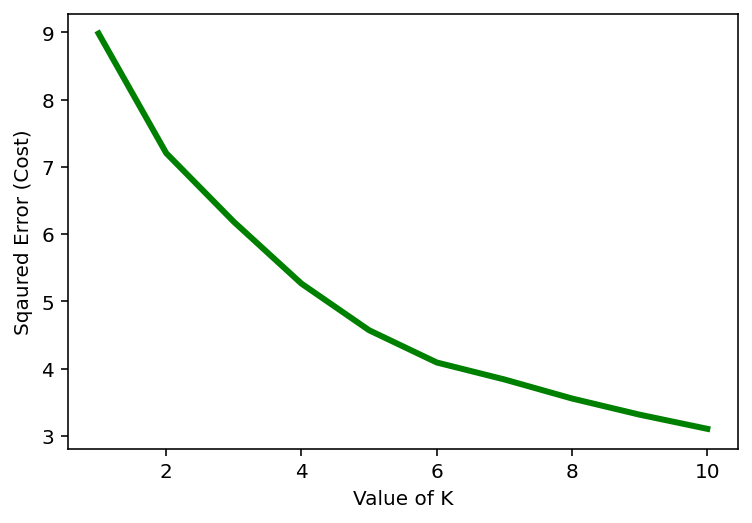

In [144]:
Tamilnadu_grouped_clustering = Tamilnadu_grouped.drop('District', 1)

cost =[] 
for i in range(1, 11): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(Tamilnadu_grouped_clustering) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM.inertia_)      
  
# plot the cost against K values 
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 

In [145]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Tamilnadu_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 3, 3, 3, 0, 3, 3, 0, 3, 3])

In [146]:
# add clustering labels
District_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Tamilnadu_merged = df

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
Tamilnadu_merged = Tamilnadu_merged.join(District_venues_sorted.set_index('District'), on='District')

Tamilnadu_merged.head() # check the last columns!

,District,Code,Date_Of_Formation,Split_From,Area,Population,Population_Density,Taluks,Latitude,Longitude,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ariyalur,AR,23 November 2007,Perambalur,1949.31,754894,390,"[Andimadam, Ariyalur, Udayarpalayam, Sendurai]",11.076036,79.117455,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Chengalpattu,CGL,29 November 2019,Kanchipuram,2944.96,2556244,868,"[Chengalpattu, Cheyyur, Madurantakam, Pallavar...",12.684089,79.983637,...,Light Rail Station,Train Station,Movie Theater,Toll Booth,Bus Station,Lake,Women's Store,Convenience Store,Cosmetics Shop,Costume Shop
2,Chennai,CH,1 November 1956,One of the original 13 districts (under former...,426.00,4646732,26076,"[Alandur, Ambattur, Aminjikarai, Ayanavaram, E...",13.083694,80.270186,...,Indian Restaurant,Hotel,Café,Ice Cream Shop,Fast Food Restaurant,Sandwich Place,Multiplex,Vegetarian / Vegan Restaurant,Italian Restaurant,Beach
3,Coimbatore,CO,1 November 1956,One of the original 13 districts,4723.00,3458045,732,"[Anaimalai, Annur, Coimbatore-North, Coimbator...",11.001812,76.962842,...,Indian Restaurant,Clothing Store,Ice Cream Shop,Asian Restaurant,Multiplex,Vegetarian / Vegan Restaurant,Café,Hotel,Dessert Shop,Pizza Place
4,Cuddalore,CU,30 September 1993,South Arcot District,3678.00,2605914,709,"[Bhuvanagiri, Chidambaram, Cuddalore, Kattuman...",11.756433,79.763464,...,Movie Theater,Beach,Vegetarian / Vegan Restaurant,Department Store,Women's Store,Electronics Store,Convenience Store,Cosmetics Shop,Costume Shop,Cricket Ground


In [147]:
Tamilnadu_merged.shape

(38, 21)

In [148]:
Tamilnadu_merged['Cluster Labels']=Tamilnadu_merged['Cluster Labels'].fillna(5)
Tamilnadu_merged['Cluster Labels']=Tamilnadu_merged['Cluster Labels'].astype(int)

In [149]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=6)

# set color scheme for the clusters
x = np.arange(kclusters+1)
ys = [i + x + (i*x)**2 for i in range(kclusters+1)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Tamilnadu_merged['Latitude'], Tamilnadu_merged['Longitude'], Tamilnadu_merged['District'], Tamilnadu_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=2).add_to(map_clusters)
       
map_clusters

## Examine Clusters

### Cluster 0

In [150]:
Tamilnadu_merged.loc[Tamilnadu_merged['Cluster Labels'] == 0, Tamilnadu_merged.columns[[0] + list(range(5, Tamilnadu_merged.shape[1]))]]

,District,Population,Population_Density,Taluks,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Dharmapuri,1506843,335,"[Dharmapuri, Harur, Karimangalam, Nallampalli,...",12.096805,78.193043,0,Optical Shop,Indian Restaurant,Bank,Electronics Store,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Cricket Ground,Cupcake Shop
9,Kanchipuram,1166401,704,"[Kanchipuram, Kundrathur, Sriperumbudur, Uthir...",12.836393,79.705330,0,Indian Restaurant,Pizza Place,Café,Bus Station,Women's Store,Donut Shop,Convenience Store,Cosmetics Shop,Costume Shop,Cricket Ground
12,Krishnagiri,1879809,366,"[Anchetty, Bargur, Denkanikottai, Krishnagiri,...",12.518883,78.220654,0,Indian Restaurant,Café,Women's Store,Fast Food Restaurant,Convenience Store,Cosmetics Shop,Costume Shop,Cricket Ground,Cupcake Shop,Department Store
13,Madurai,3038252,812,"[Madurai-East, Madurai-North, Madurai-South, M...",9.926115,78.114098,0,Indian Restaurant,Hotel,Movie Theater,Shopping Mall,Ice Cream Shop,Cupcake Shop,Café,Bakery,Comfort Food Restaurant,Business Service
16,Namakkal,1726601,513,"[Kollimalai, Kumarapalayam, Mohanur, Namakkal,...",11.284225,78.166153,0,Coffee Shop,Indian Restaurant,Fast Food Restaurant,Convenience Store,Cosmetics Shop,Costume Shop,Cricket Ground,Cupcake Shop,Department Store,Dessert Shop
21,Ranipet,1210277,542,"[Arakkonam, Arcot, Kalavai, Nemili, Sholingur,...",12.927264,79.333008,0,Indian Restaurant,Hotel,Asian Restaurant,Movie Theater,Women's Store,Fast Food Restaurant,Cosmetics Shop,Costume Shop,Cricket Ground,Cupcake Shop
22,Salem,3482056,669,"[Attur, Idappadi, Gangavalli, Kadyampatti, Met...",11.661201,78.160250,0,Indian Restaurant,Ice Cream Shop,Multiplex,Bakery,Shopping Mall,Indie Movie Theater,Chinese Restaurant,Outdoors & Recreation,Pizza Place,Department Store
26,Theni,1245899,406,"[Andipatti, Bodniayakkanur, Theni, Periyakulam...",9.969664,77.474200,0,Indian Restaurant,Bus Station,Waterfall,Fast Food Restaurant,Convenience Store,Cosmetics Shop,Costume Shop,Cricket Ground,Cupcake Shop,Department Store
29,Tirunelveli,1665253,433,"[Ambasamudram, Cheranmahadevi, Manur, Nanguner...",8.701220,77.579269,0,Train Station,Indian Restaurant,Women's Store,Electronics Store,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Cricket Ground,Cupcake Shop
33,Tiruvannamalai,2464875,398,"[Aarani, Chengam, Chetpet, Cheyyar, Jamunamara...",12.227213,79.070156,0,Vegetarian / Vegan Restaurant,Resort,Indian Restaurant,Café,Women's Store,Electronics Store,Convenience Store,Cosmetics Shop,Costume Shop,Cricket Ground


### Cluster 1

In [151]:
Tamilnadu_merged.loc[Tamilnadu_merged['Cluster Labels'] == 1, Tamilnadu_merged.columns[[0] + list(range(5, Tamilnadu_merged.shape[1]))]]

,District,Population,Population_Density,Taluks,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,Sivagangai,1339101,328,"[Devakottai, Ilayangudi, Kalayarkoil, Karaikud...",9.96506,78.720428,1,Train Station,Women's Store,Fast Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Cricket Ground,Cupcake Shop,Department Store


### Cluster 2

In [157]:
Tamilnadu_merged.loc[Tamilnadu_merged['Cluster Labels'] == 2, Tamilnadu_merged.columns[[0] + list(range(5, Tamilnadu_merged.shape[1]))]]

,District,Population,Population_Density,Taluks,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,Pudukkottai,1618345,347,"[Alangudi, Aranthangi, Avadaiyarkoil, Gandarva...",10.5,78.833333,2,Sculpture Garden,Women's Store,Electronics Store,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Cricket Ground,Cupcake Shop,Department Store


### Cluster 3

In [159]:
Tamilnadu_merged.loc[Tamilnadu_merged['Cluster Labels'] == 3, Tamilnadu_merged.columns[[0] + list(range(5, Tamilnadu_merged.shape[1]))]]

,District,Population,Population_Density,Taluks,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Chengalpattu,2556244,868,"[Chengalpattu, Cheyyur, Madurantakam, Pallavar...",12.684089,79.983637,3,Light Rail Station,Train Station,Movie Theater,Toll Booth,Bus Station,Lake,Women's Store,Convenience Store,Cosmetics Shop,Costume Shop
2,Chennai,4646732,26076,"[Alandur, Ambattur, Aminjikarai, Ayanavaram, E...",13.083694,80.270186,3,Indian Restaurant,Hotel,Café,Ice Cream Shop,Fast Food Restaurant,Sandwich Place,Multiplex,Vegetarian / Vegan Restaurant,Italian Restaurant,Beach
3,Coimbatore,3458045,732,"[Anaimalai, Annur, Coimbatore-North, Coimbator...",11.001812,76.962842,3,Indian Restaurant,Clothing Store,Ice Cream Shop,Asian Restaurant,Multiplex,Vegetarian / Vegan Restaurant,Café,Hotel,Dessert Shop,Pizza Place
4,Cuddalore,2605914,709,"[Bhuvanagiri, Chidambaram, Cuddalore, Kattuman...",11.756433,79.763464,3,Movie Theater,Beach,Vegetarian / Vegan Restaurant,Department Store,Women's Store,Electronics Store,Convenience Store,Cosmetics Shop,Costume Shop,Cricket Ground
7,Erode,2251744,394,"[Anthiyur, Bhavani, Erode, Gobichettipalayam, ...",11.369204,77.676627,3,Clothing Store,Pizza Place,Food & Drink Shop,Outdoors & Recreation,Diner,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop
8,Kallakurichi,1370281,389,"[Chinnasalem, Kallakkurichi, Kalvarayan, Hills...",11.738014,78.963933,3,ATM,Toll Plaza,Indian Restaurant,Restaurant,Bus Station,Electronics Store,Convenience Store,Cosmetics Shop,Costume Shop,Cricket Ground
10,Kanniyakumari,1870374,1119,"[Agastheeswaram, Kalkulam, Killiyur, Vilavanco...",8.087964,77.546741,3,Historic Site,Beach,Sculpture Garden,Resort,Castle,Indian Restaurant,Scenic Lookout,Hotel,Asian Restaurant,Arcade
11,Karur,1064493,357,"[Aravakurichi, Kadavur, Karur, Krishnarayapura...",10.930152,78.084855,3,Train Station,Hotel,Ice Cream Shop,Food,Bus Station,Women's Store,Electronics Store,Convenience Store,Cosmetics Shop,Costume Shop
15,Nagapattinam,697069,498,"[Kilvelur, Nagapattinam, Thirukkuvalai, Vedara...",10.805628,79.824660,3,ATM,Pharmacy,Cosmetics Shop,Bus Station,Skating Rink,Coffee Shop,Concert Hall,Convenience Store,Costume Shop,Cricket Ground
17,Nilgiris,735394,300,"[Coonoor, Gudalur, Kotagiri, Kundah, Pandalur,...",11.400000,76.700000,3,Hotel,Resort,Indian Restaurant,Vegetarian / Vegan Restaurant,Café,Mountain,Coffee Shop,Garden,Train Station,Hyderabadi Restaurant


### Cluster 4

In [161]:
Tamilnadu_merged.loc[Tamilnadu_merged['Cluster Labels'] == 4, Tamilnadu_merged.columns[[0] + list(range(5, Tamilnadu_merged.shape[1]))]]

,District,Population,Population_Density,Taluks,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Mayiladuthurai,918356,784,"[Kuthalam, Mayiladuthurai, Sirkazhi, Tharangam...",11.155182,79.627394,4,ATM,History Museum,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Cricket Ground,Cupcake Shop,Department Store,Dessert Shop
20,Ramanathapuram,1353445,331,"[Kadaladi, Kamuthi, Kilakarai, Mudukulathur, P...",9.843707,79.073967,4,ATM,Restaurant,Electronics Store,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Cricket Ground,Cupcake Shop,Department Store
24,Tenkasi,1407627,483,"[Alangulam, Kadayanallur, Sankarankoil, Shenko...",9.031896,77.365361,4,ATM,Indian Restaurant,Café,Fast Food Restaurant,Convenience Store,Cosmetics Shop,Costume Shop,Cricket Ground,Cupcake Shop,Department Store
30,Tirupattur,1111812,618,"[Ambur, Natrampalli, Tirupattur, Vaniyambadi]",12.490898,78.564709,4,ATM,Train Station,Fast Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Cricket Ground,Cupcake Shop,Department Store


### Cluster 5

In [163]:
Tamilnadu_merged.loc[Tamilnadu_merged['Cluster Labels'] == 5, Tamilnadu_merged.columns[[0] + list(range(5, Tamilnadu_merged.shape[1]))]]

,District,Population,Population_Density,Taluks,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ariyalur,754894,390,"[Andimadam, Ariyalur, Udayarpalayam, Sendurai]",11.076036,79.117455,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Dindigul,2159775,345,"[Athoor, Dindigul-West, Dindigul-East, Gujilia...",10.330330,78.067398,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,Perambalur,565223,320,"[Alathur, Kunnam, Perambalur, Veppanthattai]",11.228772,78.818256,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,Vellore,1614242,795,"[Anaicut, Gudiyatham, Pernambut, Katpadi, Kilv...",12.794811,79.000641,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,Virudhunagar,1942288,453,"[Aruppukkottai, Kariapatti, Rajapalayam, Sattu...",9.520894,77.878456,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
